In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/Users/victor/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/victor/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/victor/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/victor/opt/anaconda3/lib/python3.7/site-packages/tensorflow/

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [5]:
x_data = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)
y_label = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

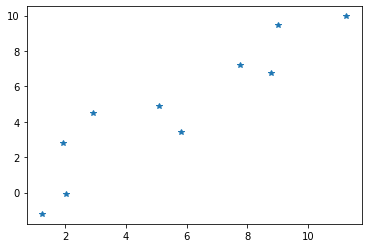

In [6]:
plt.plot(x_data,y_label,'*')

In [7]:
np.random.rand(2)

array([0.68067777, 0.52154819])

In [11]:
m = tf.Variable(0.39,dtype = tf.float32)
b = tf.Variable(0.2,dtype = tf.float32)
error = tf.reduce_mean((y_label, - (m*x_data+b)))

In [12]:
optmizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optmizer.minimize(error)

In [13]:
init = tf.global_variables_initializer()

## Salvando um modelo

In [14]:
saver = tf.train.Saver()

In [16]:
#Criando uma sessão e executando
with tf.Session() as sess:
    sess.run(init)
    epochs = 100
    for i in range(epochs):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])
    saver.save(sess, 'exemplo-modelo.ckpt')

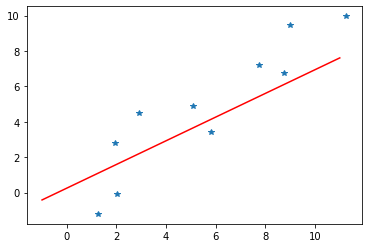

In [17]:
#validando
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test, y_pred_plot,'r')
plt.plot(x_data, y_label, '*')

## Carregando um modelo

In [18]:
with tf.Session() as sess:
    saver.restore(sess,'exemplo-modelo.ckpt')
    restored_slope, restored_intercept = sess.run([m,b])

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from exemplo-modelo.ckpt


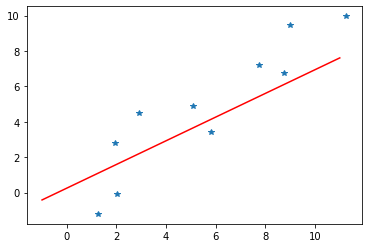

In [19]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test, y_pred_plot,'r')
plt.plot(x_data, y_label, '*')